In [97]:
import json
import pandas as pd
import boto3
import sagemaker
from io import StringIO
import nltk
from pprint import pprint
import matplotlib.pyplot as plt

In [54]:
# Configure SageMaker
role = 'arn:aws:iam::415253945408:role/garrett-sagemaker-role-full-access'
sess = sagemaker.Session()
region = boto3.session.Session().region_name
print("Region = {}".format(region))
sm = boto3.Session().client('sagemaker')

Region = us-east-1


In [55]:
bucket_name = 'nlp-datasets-ghs'
data_prefix = 'sentiment-analysis/'

In [56]:
# Read dataset in as Pandas DF
s3_client = boto3.client('s3')
bucket_name = 'nlp-datasets-ghs'
s3 = boto3.resource('s3')
s3_object = s3.Bucket('nlp-datasets-ghs').Object(data_prefix+'reduced_yelp_reviews.csv').get()

In [57]:
# Read streaming object into DF
body = s3_object['Body']
csv_string = body.read().decode('utf-8')
yelp_df = pd.read_csv(StringIO(csv_string))

In [71]:
# Download nltk data
nltk.download([
    "names", 
    "stopwords", 
    "state_union", 
    "twitter_samples", 
    "movie_reviews", 
    "averaged_perceptron_tagger", 
    "vader_lexicon", 
    "punkt", 
    "shakespeare"])

[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package state_union to /root/nltk_data...
[nltk_data]   Package state_union is already up-to-date!
[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   

True

In [85]:
# Load state of the union text and remove stopwords
words = [w for w in nltk.corpus.state_union.words() if w.isalpha()]
stopwords = nltk.corpus.stopwords.words('english')
words = [w for w in words if w.lower() not in stopwords]

In [92]:
# Tokenize the string
dummy_str = 'Sav is amazing and a great girlfriend.'
nltk.word_tokenize(dummy_str)

['Sav', 'is', 'amazing', 'and', 'a', 'great', 'girlfriend', '.']

    must   people    world     year  America       us      new Congress    years American 
    1568     1291     1128     1097     1076     1049     1049     1014      827      784 


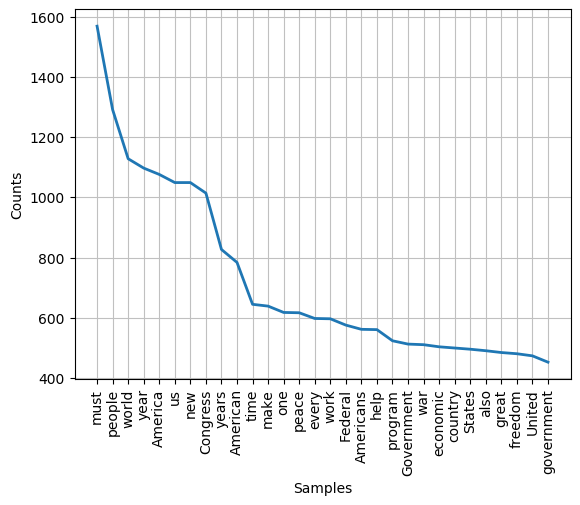

In [103]:
# Create frequency distribution
fd = nltk.FreqDist(words)
fd.tabulate(10)
fd.plot(30)

FreqDist({'must': 1568, 'people': 1291, 'world': 1128, 'year': 1097, 'America': 1076, 'us': 1049, 'new': 1049, 'Congress': 1014, 'years': 827, 'American': 784, ...})